## <center> Dataset - Fish Market Dataset </center>


---




## Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

Using data from https://www.kaggle.com/datasets/aungpyaeap/fish-market

## Data visualization and exploration

In [ ]:
fish_df = pd.read_csv("Fish.csv")
fish_df.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


Class Imbalance

           Frequency
Species             
Perch             56
Bream             35
Roach             20
Pike              17
Smelt             14
Parkki            11
Whitefish          6


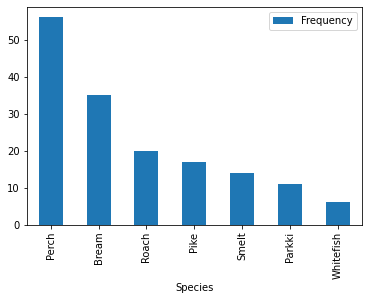

In [ ]:
# Count the frequency to understand the distribution of data and add to a new a column "Frequency"
fish_df['Frequency'] = fish_df.groupby('Species')["Species"].transform('count')
# Print the dataset with only Species and Frequency cloumns. Group by Species and sort by Frequency
print(fish_df[['Species', 'Frequency']].groupby("Species").count().sort_values("Frequency", ascending=False))
# Plot a bar chart (Species vs Frequency)
plot_df = fish_df[['Species', 'Frequency']].groupby("Species").count().sort_values("Frequency", ascending=False)
plot_df.plot.bar()

Looking at the frequency, we can understand the dataset is not very balanced and with some classes having few fields (such as Whitefish) and some classes having a lot of fields (Perch) in comparison.

Visualizatig to get an insight about the dataset

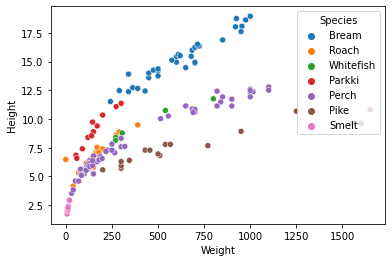

In [ ]:
sns.scatterplot(data=fish_df, hue='Species', x='Weight', y='Height')

From the scatter plot, lot of insight can be derived regarding the data Set, the pattern in each group, outliners, minority and majority classess, general idea/average about each group etc. 
1. Spread of fish data by Weight against Height
2. Bream is the largest of all fish species in the dataSet, they grow significantly large in height than any other species and usually weight a lot
3. Smelt species do not grow a lot by both Height and Weight
4. Perch, Pike, Bream usually Weight the most
5. Only few data points representing Whitefish can be found
6. A lot of Perch Species data points can be seen scattered from lower to higher values across the plot")


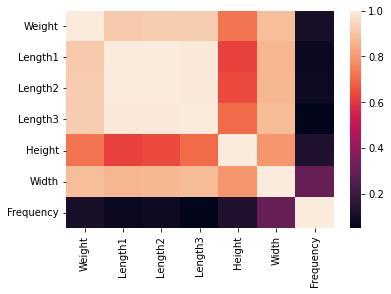

In [ ]:
sns.heatmap(fish_df.corr())

Looking at the Heatmap, we can see:

1. Most of the featuers are corelated to the predictor variable Weight.
2. All have positive relation and contribute to the predictor variable.
3. Height is the least related.
4. Due to multicollinearity, Multiple linear Regression model may fit best.

Plotting Weight


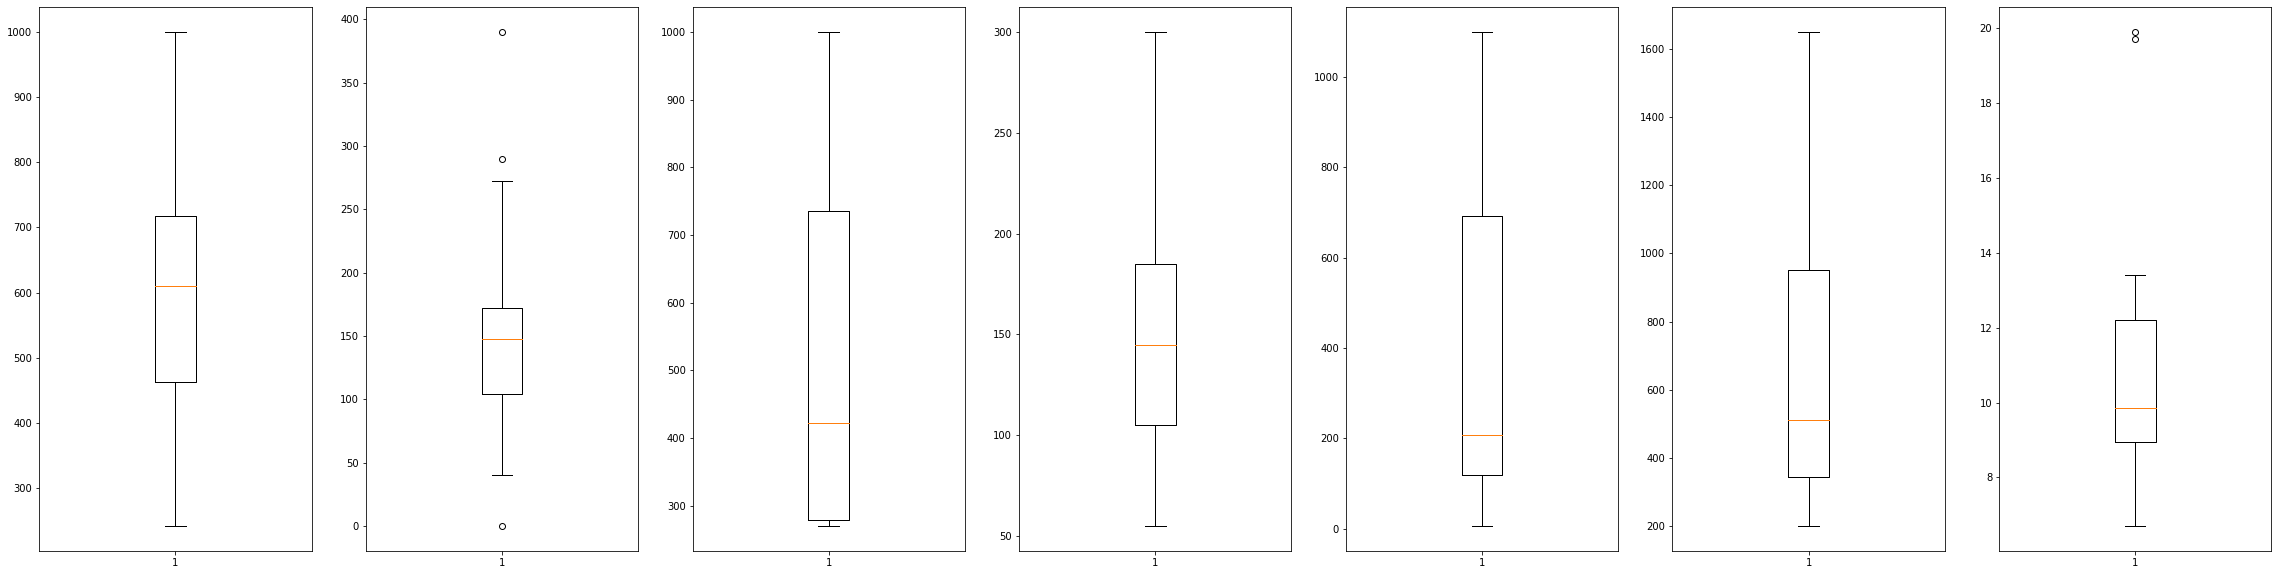

Plotting Length1


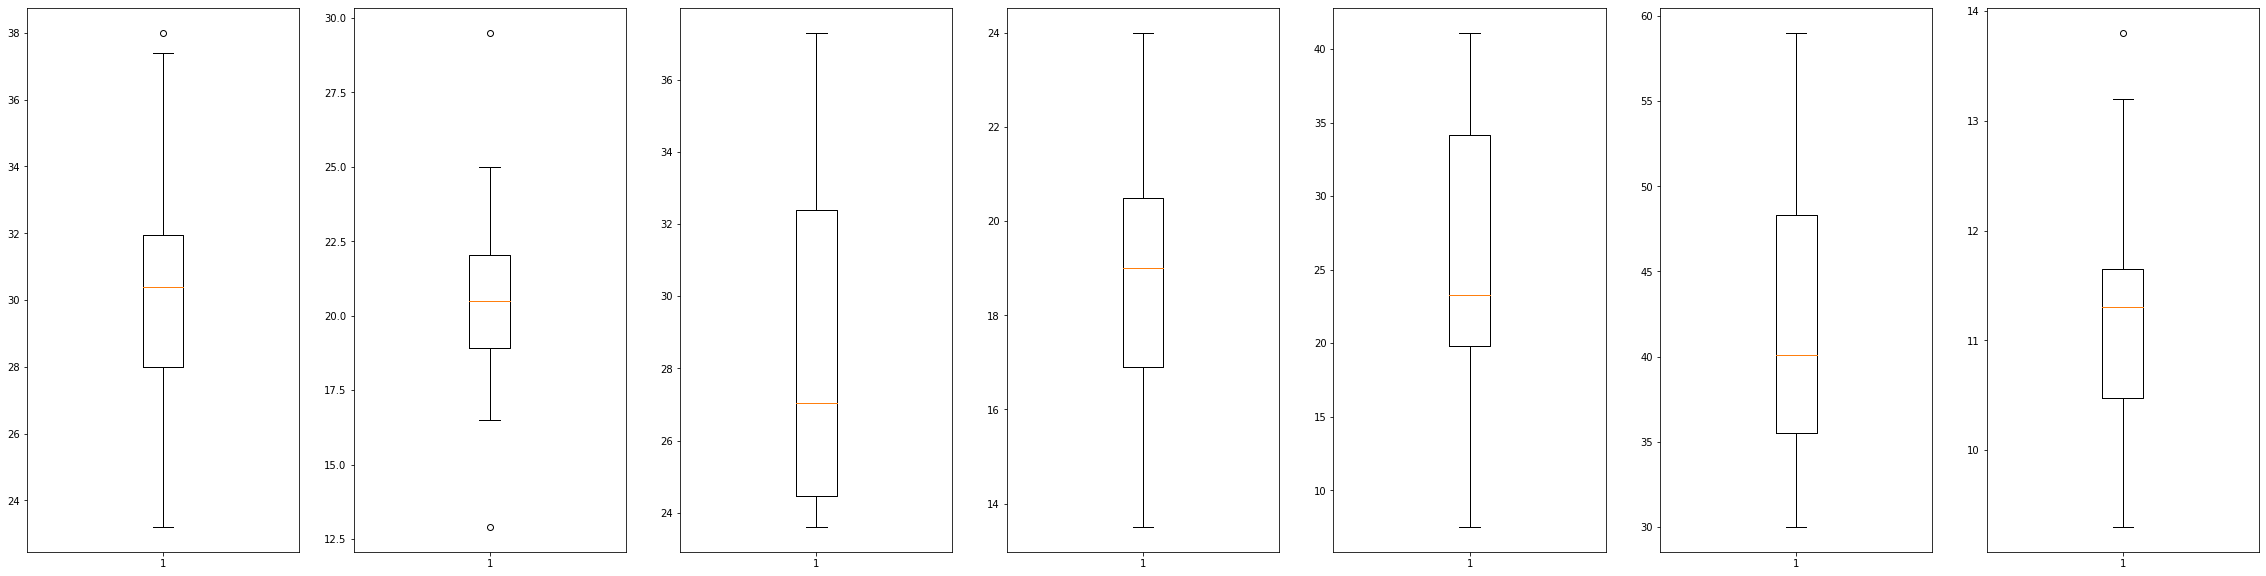

Plotting Length2


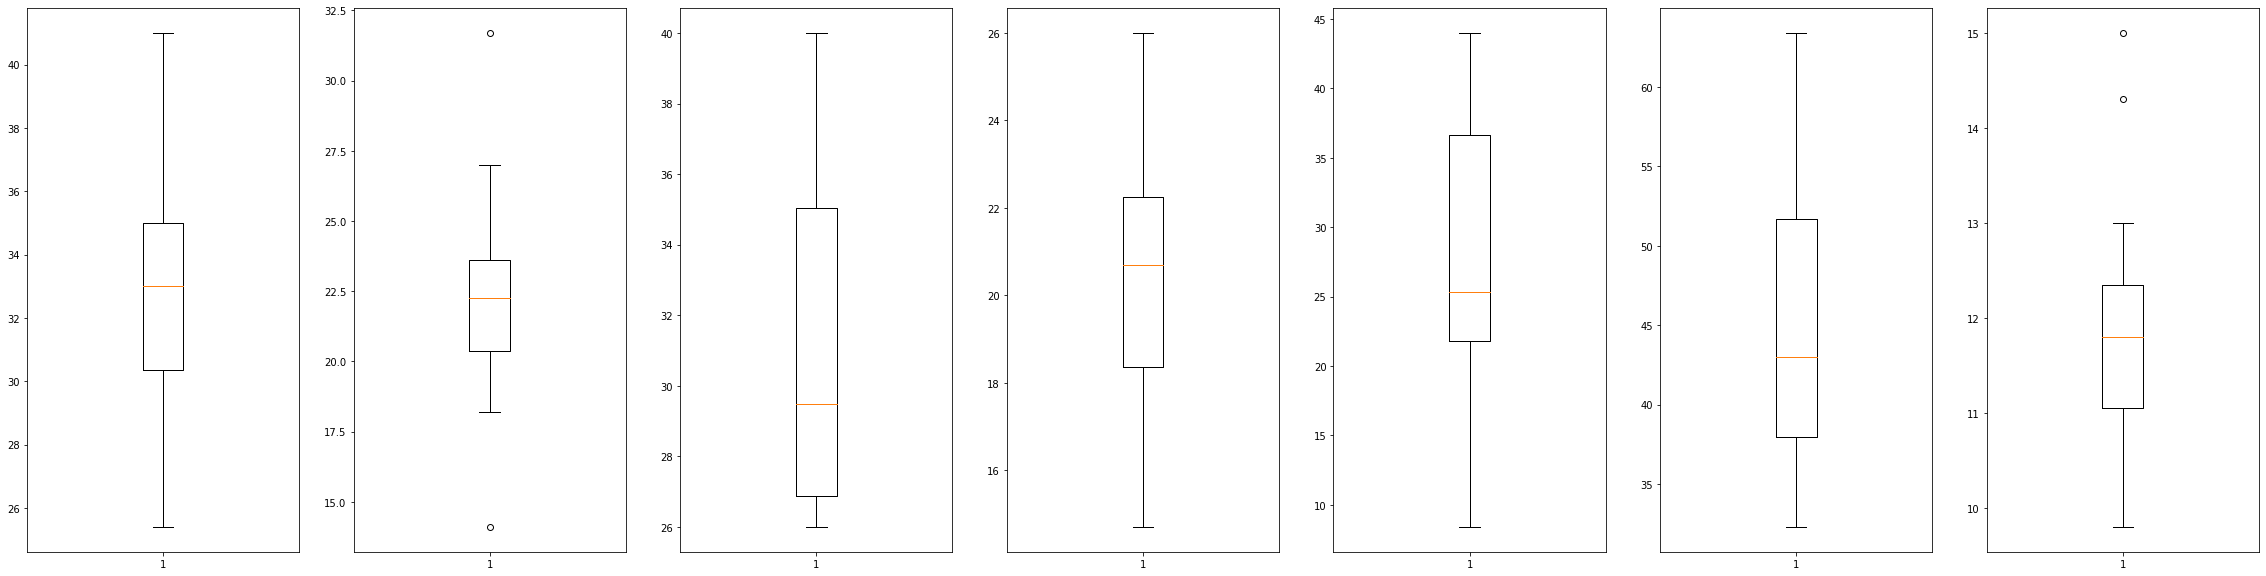

Plotting Length3


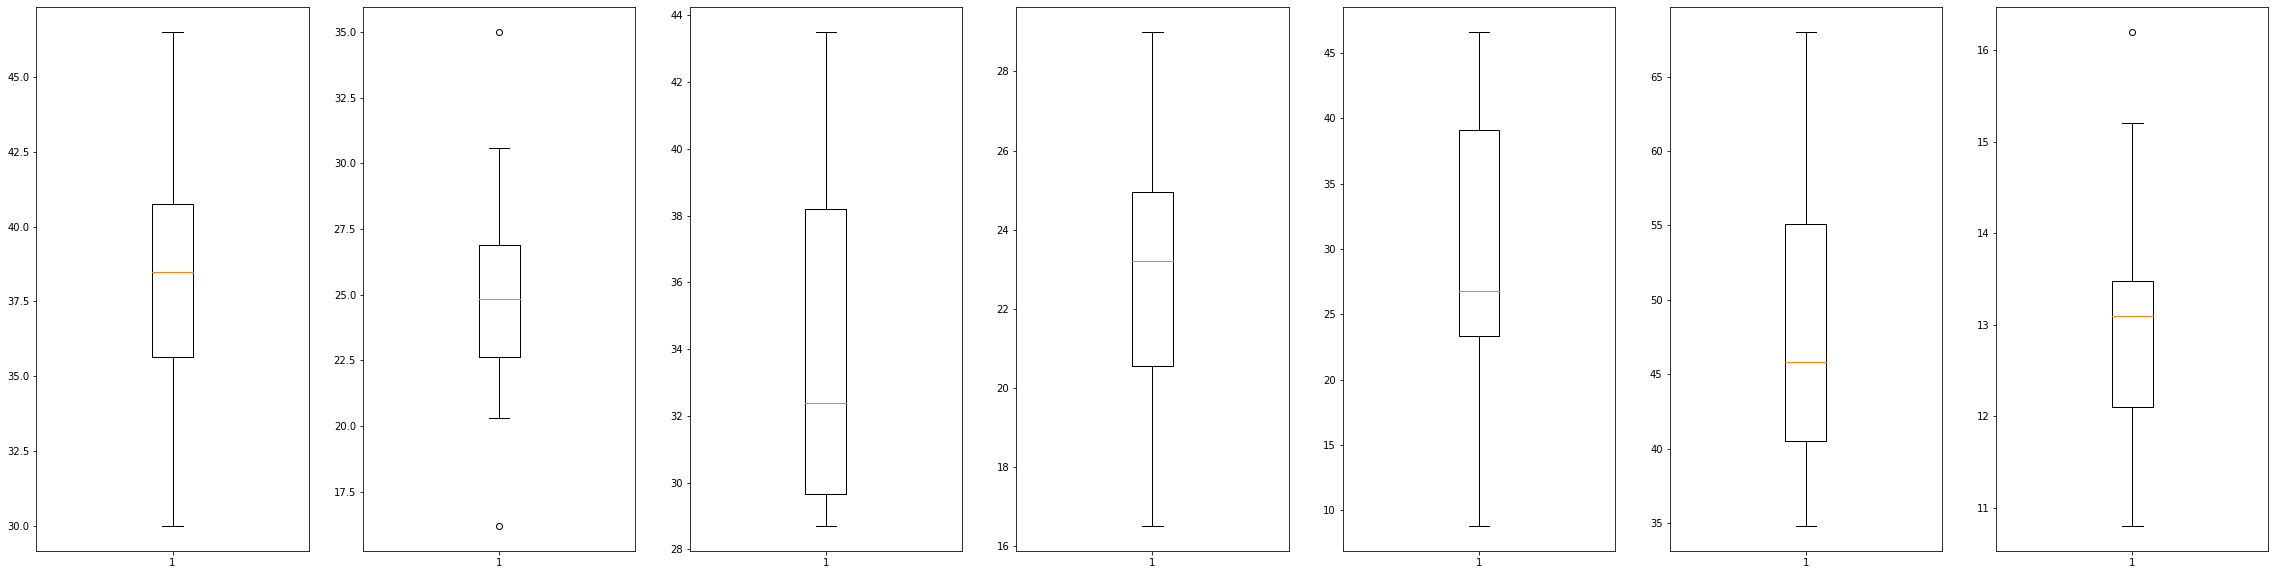

Plotting Height


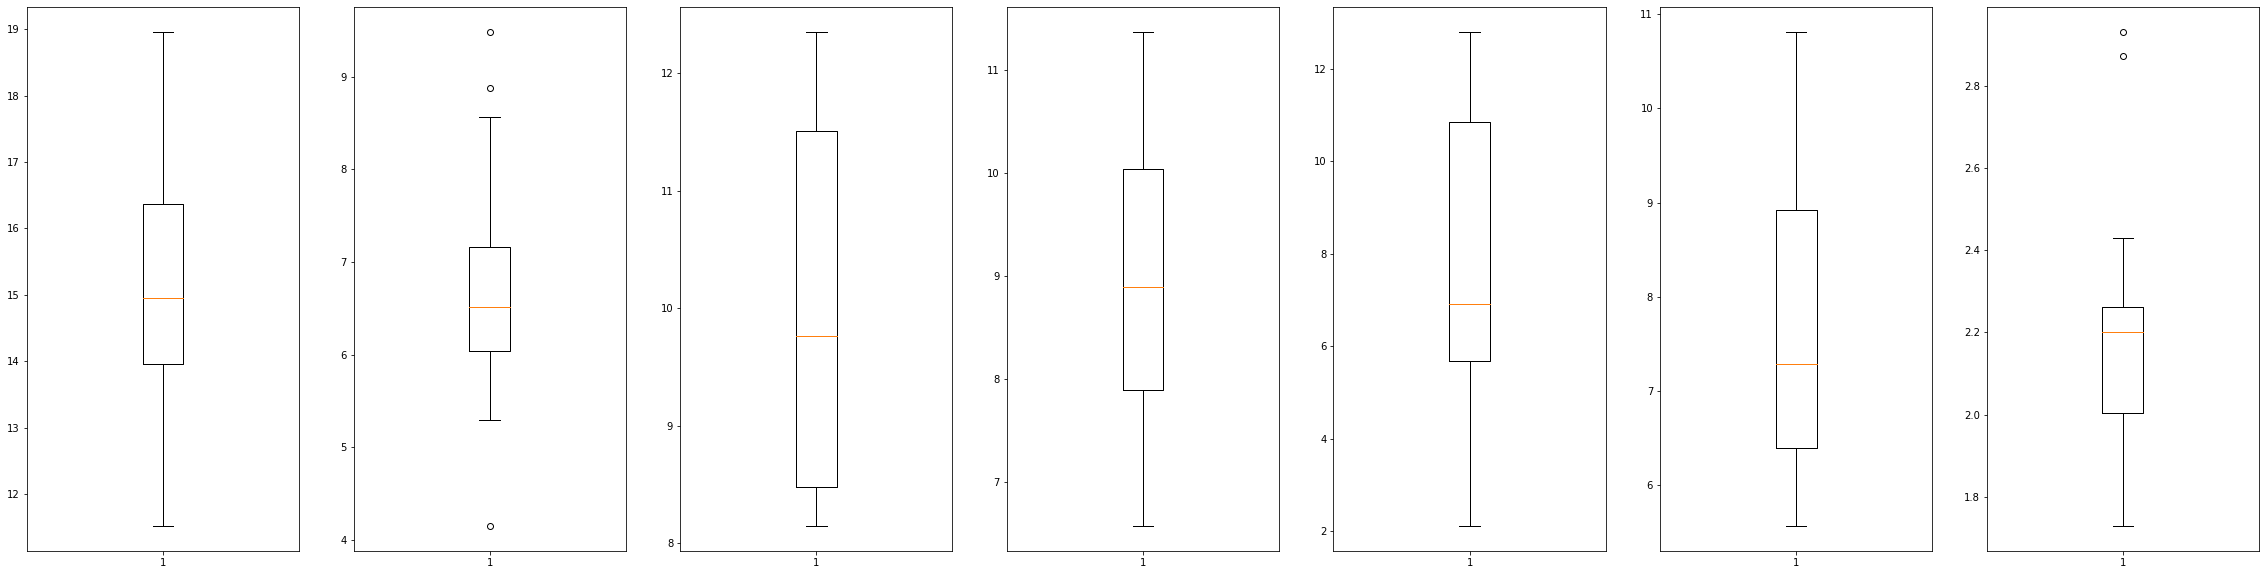

Plotting Width


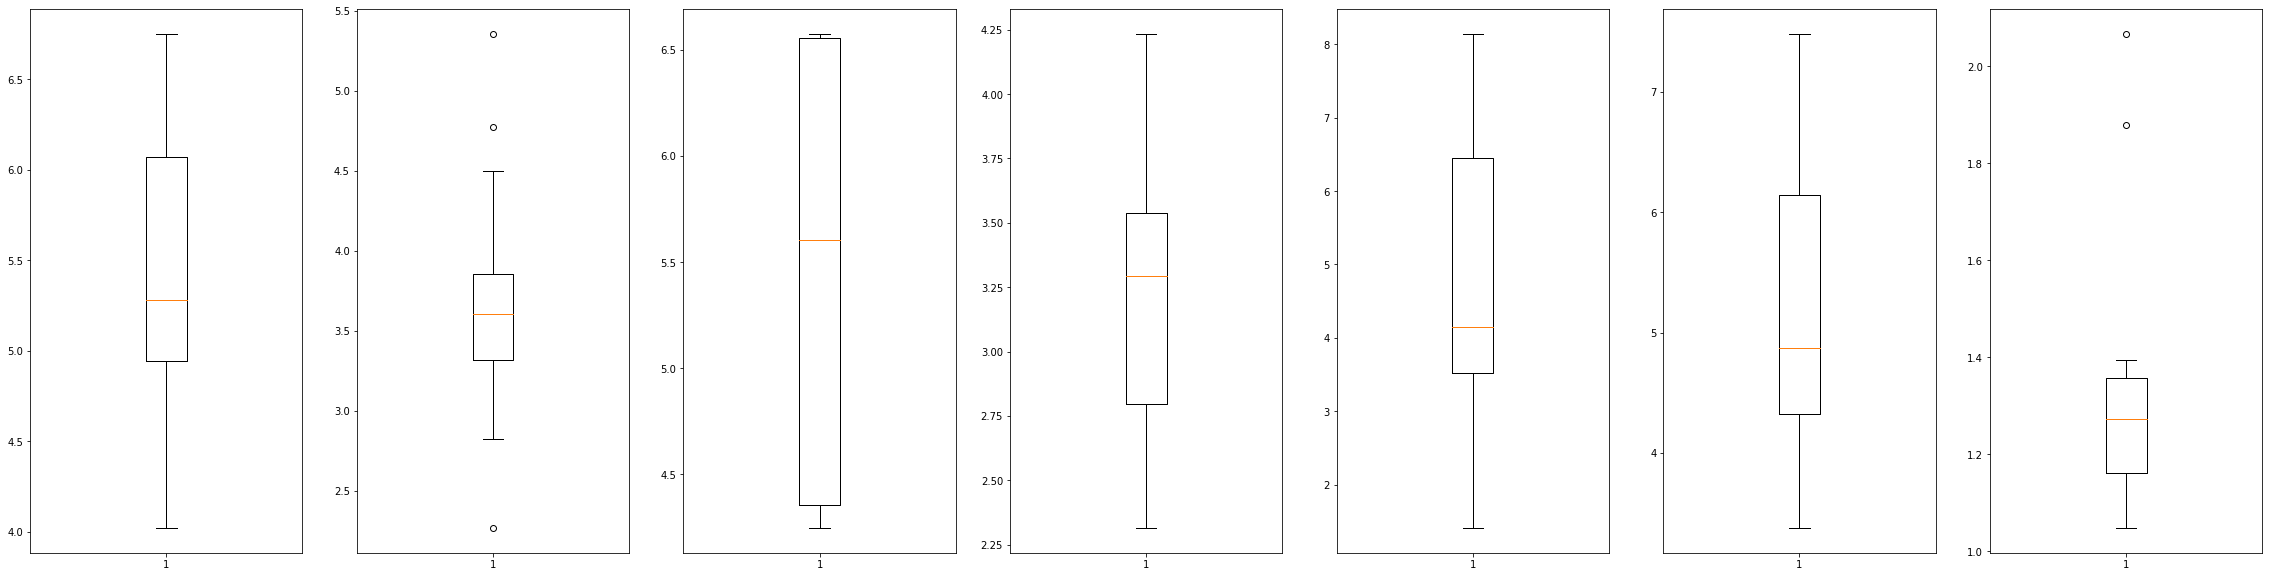

In [ ]:
data_bream = fish_df[fish_df['Species']=='Bream']
data_roach = fish_df[fish_df['Species']=='Roach']
data_whitefish = fish_df[fish_df['Species']=='Whitefish']
data_parkii = fish_df[fish_df['Species']=='Parkki']
data_perch = fish_df[fish_df['Species']=='Perch']
data_pike = fish_df[fish_df['Species']=='Pike']
data_smelt = fish_df[fish_df['Species']=='Smelt']

data = [data_bream, data_roach, data_whitefish, data_parkii, data_perch, data_pike, data_smelt]

for col in ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']:
  print (f"Plotting {col}")
  fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, figsize=(40, 10))
  ax1.boxplot(data[0][col])
  ax2.boxplot(data[1][col])
  ax3.boxplot(data[2][col])
  ax4.boxplot(data[3][col])
  ax5.boxplot(data[4][col])
  ax6.boxplot(data[5][col])
  ax7.boxplot(data[6][col])
  plt.show()

It's clearly evident that Roach & Smelt fish have got outliers in every feature.

## Data Pre-processing and cleaning

In [ ]:
for col in ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']:
  fish_column = fish_df[col]
  Q3 = fish_column.quantile(0.75)
  Q1 = fish_column.quantile(0.25)
  IQR = Q3-Q1
  lower_limit = Q1 -(1.5*IQR)
  upper_limit = Q3 +(1.5*IQR)
  _outliers = fish_column[(fish_column <lower_limit) | (fish_column >upper_limit)]
  print(_outliers)

df = fish_df.drop([142,143,144])

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64
142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64
142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64
144    68.0
Name: Length3, dtype: float64
Series([], Name: Height, dtype: float64)
Series([], Name: Width, dtype: float64)


From the above output, we can clearly see all outliers are from data field 142,143 and 144, which we can drop.

There are some data balancing techniques such as Over sampling and under sampling which can be used to fix any imbalance in the data, but it may not be required in our case as there may not be significant improvement given this is not such a huge dataset.

There are also feature Engineering options such as Grouping (to group length1,2,3 columns into) to try to imrpove the performance of the model, but it is a better option to use 3 dimensions which are linearly dependent on the predictor value so that each of them can be represented better by the model.

In [ ]:
fish_df.isnull().values.any()

False

## Model Building

In [ ]:
fish_df['Species'] = pd.Categorical(fish_df['Species']).codes

X = fish_df[['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
Y = fish_df['Weight']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.9, random_state=1)

In the above section, we are defining X and Y variables, Y being the predictor variable "Weight". Then we are performing 2 split with 80-20 (train - test)% and (10-90)% split.

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

Here we are creating KFold (K=10), to perform KFold cross validation

In [ ]:
reg1 = LinearRegression().fit(X_train1, y_train1)
y_head1 = reg1.predict(X_train1)
print(r2_score(y_train1, y_head1))
cross_val_score_train = cross_val_score(reg1, X_train1, y_train1, cv=cv, scoring='r2')
print(cross_val_score_train)

0.8940639490431052
[0.85588443 0.74394443 0.89288061 0.93473173 0.79959645 0.8221685
 0.81238617 0.89197464 0.93507175 0.73721579]


Here we are doing few things:
1. Creating/fitting the model for x_train1 data
2. Predicting values from x_train1 using the model, the model has **$R^2$ = 89%**
3. Calculating the cross validation scores

In [ ]:
reg2 = LinearRegression().fit(X_train2, y_train2)
y_head2 = reg2.predict(X_train2)
print(r2_score(y_train2, y_head2))
cross_val_score_train = cross_val_score(reg2, X_train2, y_train2, cv=cv, scoring='r2')
print(cross_val_score_train)

0.8895044645729254
[  0.66427483 -49.98585678   0.10515811  -1.7849448    0.11285828
          nan          nan          nan          nan          nan]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

We are performing the same steps as above but for the 2nd split which is (90-10). As we can see the error that there are less samples, it is very clear that 10-90 is a very bad split as it may not create a very generalized model due to less data.

## Performance Evaluation

In [ ]:
y_pred1 = reg1.predict(X_test1)
print("R2 Model 1 with (80-20) split: " + str(r2_score(y_test1, y_pred1)))
y_pred2 = reg2.predict(X_test2)
print("R2 Model 1 with (10-90) split: " + str(r2_score(y_test2, y_pred2)))

R2 Model 1 with (80-20) split: 0.8856778285607881
R2 Model 1 with (10-90) split: 0.6569836658286776


We can see that the $R^2$ for both model is ~ 88.5% and 65%.
Clearly Model 1 Performs very well compared to Model 2.

In [ ]:
rms_train = np.sqrt(mean_squared_error(y_train1, reg1.predict(X_train1)))
rms_test = np.sqrt(mean_squared_error(y_test1, reg1.predict(X_test1)))
print("RMS for Model 1 train & test data respectively is ", rms_train, rms_test)

rms_train = np.sqrt(mean_squared_error(y_train1, reg2.predict(X_train1)))
rms_test = np.sqrt(mean_squared_error(y_test1, reg2.predict(X_test1)))
print("RMS for Model 2 train & test data respectively is ", rms_train, rms_test)

RMS for Model 1 train & test data respectively is  114.96499737315693 124.27395130028411
RMS for Model 2 train & test data respectively is  191.48336618026687 200.75790275036536


1. As we can see the model has performed well wth 88.5% for Model 1 and 65% for Model 2 $R^2$ 
2. Model 1 has less $RMS$ compared to Model 2.
3. This shows that the Model 1 fits well and can predict with good accuracy for new unseen values.
4. We do not need other performance measures such as Accuracy,  F1-score, Efficiency, sensitivity or specificity as it is not relevant to a regression model.

## Extras - for styling

In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)